### This project uses the following notebooks used to create the models detecting the retina disease in diabetic patients.

1. 1_CNN_Model_Baseline.ipynb - testing on small subset of images across 5 different stages
2. 2_CNN_Model.ipynb (current) - binary classification of final dataset, created baseline and second iteration 
3. 3_TL_MobileNet_Model.ipynb - binary classification of final dataset using transfer learning with MobileNet V2 model
4. 4_Yolov5_Model.ipynb - further experimentation to detect multiclassification on different stages of diabetic retinopathy as next steps.

### 2_CNN_Model.ipynb (current):

This notebook represents the binary classification of images - healthy or non-healthy. Gets a baseline score first and then reran with additional dense layers and dropout layers for regularization.

Total number of images used in this set are 9741 in training set and 892 in validation set.


## 1. Imports used for CNN Model setup

In [ ]:
#regular imports
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
# tensorflow imports
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#metrics imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, roc_curve, auc, classification_report


## 2. Connect to drive

In [ ]:
#connect to google drive content to use the image datasets
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 3. Create Augmentation using ImageDataGenerator on dataset

In [ ]:
#binary classification - healthy/non-healthy
data_dir = '/content/drive/MyDrive/Colab Notebooks/Capstone/binary_train/'
test_dir = '/content/drive/MyDrive/Colab Notebooks/Capstone/binary_val/'

train_datagen = ImageDataGenerator(
    horizontal_flip=True, #Generate an image flipped along the X-Axis
    vertical_flip=True, #Generate an image flipped along the Y-Axis
    rotation_range= 10, #Generate an image rotated 45 degrees
    brightness_range = [0.75,1.25], #Generate an image with a brightness range of +-25%
    shear_range = 0.05, #Shear Rotation by +-5 degrees 
    validation_split= 0.3 #Train Test Split Ration
)
#rescale validation data only, no augmentation on validation data
test_datagen = ImageDataGenerator(rescale=1./255) 

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(640, 640),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(640, 640),
    batch_size=32,
    class_mode='binary')

Found 10217 images belonging to 2 classes.
Found 892 images belonging to 2 classes.


## 4. Build the CNN Model architecture

In [ ]:
#input shape same as the dataset shape in train and validation sets
INPUT_SHAPE = (640,640,3)
#instantiate Sequential and CNN layers with maxpooling
#for baseline
# model = Sequential()
# model.add(Conv2D(32, (3,3), activation='relu', input_shape = INPUT_SHAPE))
# model.add(MaxPooling2D( (2,2) ) )
# model.add(Conv2D(32, (3,3), activation='relu'))
# model.add(MaxPooling2D( (2,2) ) )
# model.add(Flatten())
# model.add(Dense(32, activation ='relu'))
# model.add(Dense(1, activation='softmax'))

# for next iteration
model = Sequential()

model.add(Conv2D(16, (3,3), activation='relu', input_shape = INPUT_SHAPE))
model.add(MaxPooling2D( (2,2) ) )
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D( (2,2) ) )
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D( (2,2) ) )
model.add(Dropout(0.2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D( (2,2) ) )
model.add(Dropout(0.2))
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D( (2,2) ) )

model.add(Flatten())
model.add(Dense(1024, activation ='relu'))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
#Compile with binary and adam optimizer
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [ ]:
#check the model architecure summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 638, 638, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 319, 319, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 317, 317, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 158, 158, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 156, 156, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 78, 78, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 76, 76, 128)       7

## 5. Fit the CNN Model

- Total trainable params built with the layers - 85,329,313

In [ ]:
results = model.fit(train_generator,
                    epochs = 10,
                    batch_size=32,
                    validation_data = validation_generator)

Epoch 1/10
320/320 [==============================] - 7143s 22s/step - loss: 28.4729 - acc: 0.8488 - val_loss: 0.6111 - val_acc: 0.7253
Epoch 2/10
320/320 [==============================] - 979s 3s/step - loss: 0.3928 - acc: 0.8657 - val_loss: 0.6434 - val_acc: 0.7253
Epoch 3/10
320/320 [==============================] - 988s 3s/step - loss: 0.3828 - acc: 0.8709 - val_loss: 0.6700 - val_acc: 0.7253
Epoch 4/10
320/320 [==============================] - 976s 3s/step - loss: 0.3855 - acc: 0.8671 - val_loss: 0.8119 - val_acc: 0.7253
Epoch 5/10
320/320 [==============================] - 974s 3s/step - loss: 0.3880 - acc: 0.8650 - val_loss: 0.7168 - val_acc: 0.7253
Epoch 6/10
320/320 [==============================] - 976s 3s/step - loss: 0.3816 - acc: 0.8697 - val_loss: 0.7336 - val_acc: 0.7253
Epoch 7/10
320/320 [==============================] - 931s 3s/step - loss: 0.3861 - acc: 0.8644 - val_loss: 0.8399 - val_acc: 0.7253
Epoch 8/10
217/320 [===================>..........] - ETA: 5:07 - 

In [ ]:
# results = model.fit(train_generator,
#                     epochs = 10,
#                     batch_size=32,
#                     validation_data = validation_generator)

Epoch 1/10
305/305 [==============================] - 5667s 19s/step - loss: 13.9816 - acc: 0.8863 - val_loss: 0.6241 - val_acc: 0.7253
Epoch 2/10
305/305 [==============================] - 1037s 3s/step - loss: 0.3064 - acc: 0.9066 - val_loss: 0.7055 - val_acc: 0.7253
Epoch 3/10
305/305 [==============================] - 1023s 3s/step - loss: 0.2950 - acc: 0.9133 - val_loss: 0.6206 - val_acc: 0.7253
Epoch 4/10
305/305 [==============================] - 1020s 3s/step - loss: 0.3019 - acc: 0.9077 - val_loss: 0.6207 - val_acc: 0.7253
Epoch 5/10
305/305 [==============================] - 1017s 3s/step - loss: 0.2919 - acc: 0.9121 - val_loss: 0.6487 - val_acc: 0.7253
Epoch 6/10
305/305 [==============================] - 1005s 3s/step - loss: 0.3003 - acc: 0.9081 - val_loss: 0.6284 - val_acc: 0.7253
Epoch 7/10
305/305 [==============================] - 994s 3s/step - loss: 0.2979 - acc: 0.9076 - val_loss: 0.6031 - val_acc: 0.7253
Epoch 8/10
305/305 [==============================] - 1017s 3

In [ ]:
#dont run evaluate the model for validation data
model.evaluate(validation_generator)

28/28 [==============================] - 8s 294ms/step - loss: 0.6163 - acc: 0.7253


[0.6163251996040344, 0.7253363132476807]

In [ ]:
#dont run
STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size
validation_generator.reset()
preds = model.predict(validation_generator,
verbose=1)

28/28 [==============================] - 8s 286ms/step


## 6. Plot ROC/AUC Curve

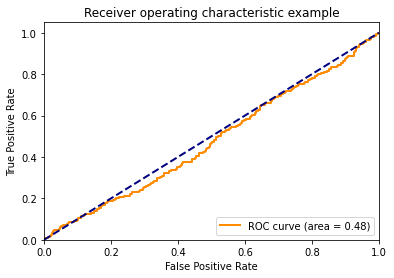

In [ ]:
#dont run
fpr, tpr, _ = roc_curve(validation_generator.classes, preds)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC / ROC Curve')
plt.legend(loc="lower right")Addi47.5
plt.show()

In [ ]:
# model.save('/content/drive/MyDrive/Colab Notebooks/Capstone/cnn_model_binary.hd5')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Capstone/cnn_model_binary.hd5/assets


## 7. Plot the accuracy and loss curves

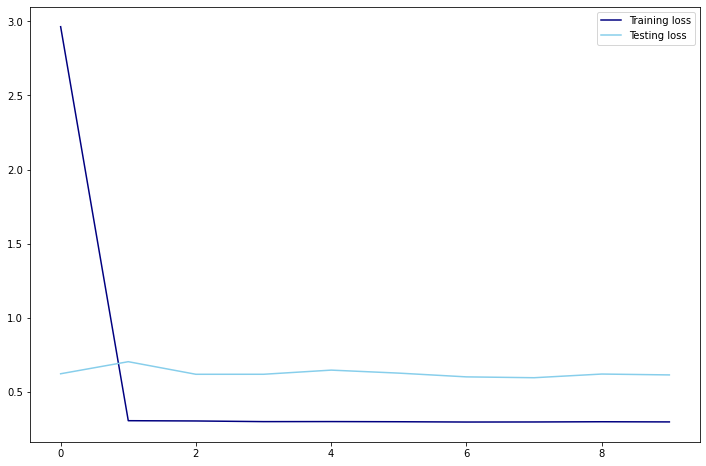

In [ ]:
#3. dont run - Visualize the loss - updated
train_loss = results.history['loss']
test_loss =  results.history['val_loss']

plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training loss', color='navy')
plt.plot(test_loss, label='Testing loss', color='skyblue')
plt.legend();

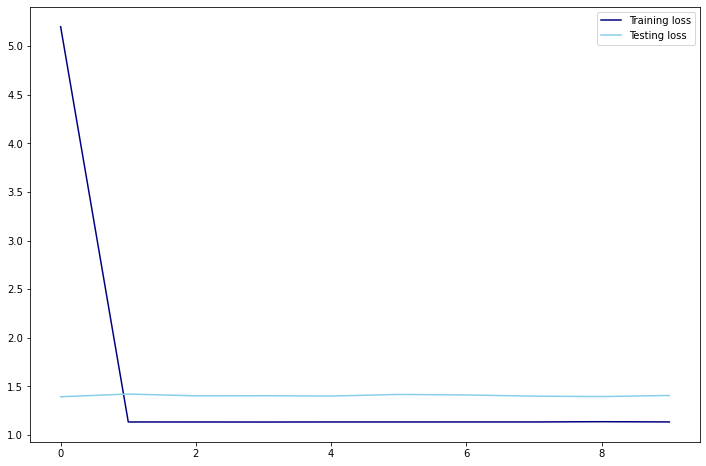

In [ ]:
#2. dont run - Visualize the loss - updated to 2 classes
train_loss = results.history['loss']
test_loss =  results.history['val_loss']

plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training loss', color='navy')
plt.plot(test_loss, label='Testing loss', color='skyblue')
plt.legend();

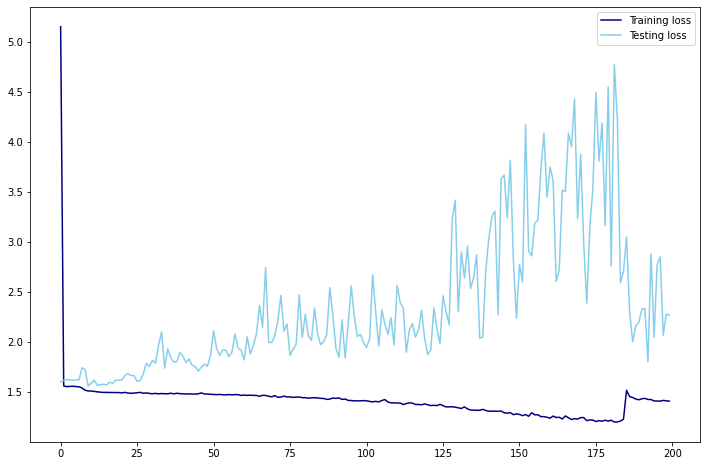

In [ ]:
#1. dont run - Visualize the loss - baseline with 5 classes
train_loss = results.history['loss']
test_loss =  results.history['val_loss']

plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training loss', color='navy')
plt.plot(test_loss, label='Testing loss', color='skyblue')
plt.legend();

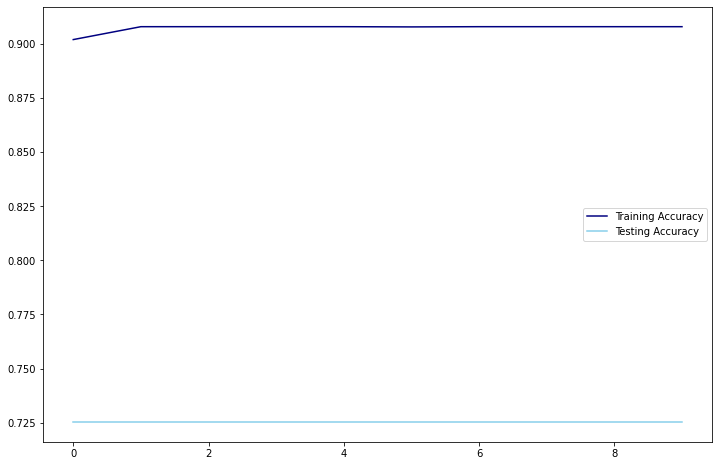

In [ ]:
#3. dont rung - acc for binary
train_acc = results.history['acc']
test_acc =  results.history['val_acc']

plt.figure(figsize=(12, 8))
plt.plot(train_acc, label='Training Accuracy', color='navy')
plt.plot(test_acc, label='Testing Accuracy', color='skyblue')
plt.legend();

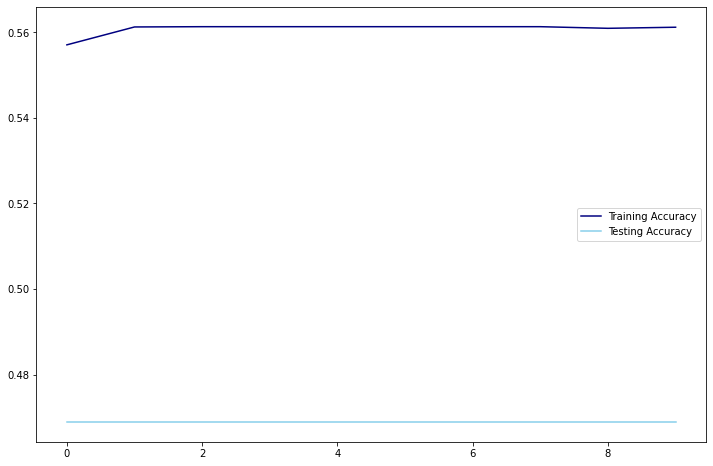

In [ ]:
#2. dont run - acc for binary classes - use as baseline
train_acc = results.history['acc']
test_acc =  results.history['val_acc']

plt.figure(figsize=(12, 8))
plt.plot(train_acc, label='Training Accuracy', color='navy')
plt.plot(test_acc, label='Testing Accuracy', color='skyblue')
plt.legend();

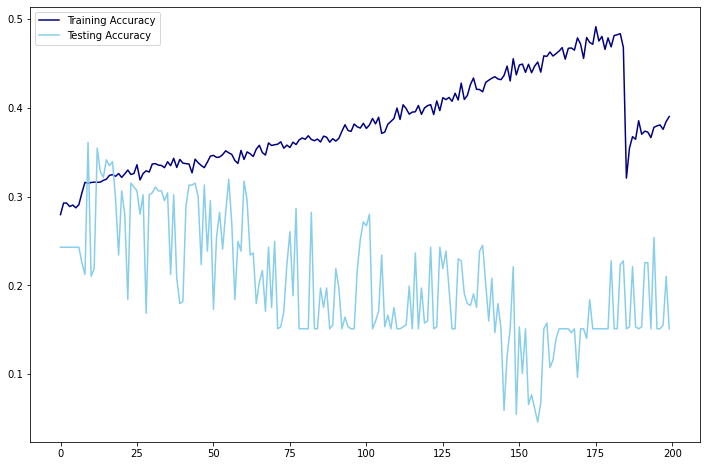

In [ ]:
# dont run - baseline for 5 classes
train_acc = results.history['acc']
test_acc =  results.history['val_acc']

plt.figure(figsize=(12, 8))
plt.plot(train_acc, label='Training Accuracy', color='navy')
plt.plot(test_acc, label='Testing Accuracy', color='skyblue')
plt.legend();

## 8. Test Predictions

In [ ]:
test_data_path = '/content/drive/MyDrive/Colab Notebooks/Capstone/binary_test/'
test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(
    test_data_path, # Put your path here
     target_size=(640, 640),
    batch_size=32,
    shuffle=False)
test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

predictions = model.predict(test_data_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)


Found 1260 images belonging to 2 classes.


In [ ]:
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())  

## 9. Run Classification Report

In [ ]:
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1042
           1       0.00      0.00      0.00       218

    accuracy                           0.83      1260
   macro avg       0.41      0.50      0.45      1260
weighted avg       0.68      0.83      0.75      1260



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Summary:

This notebook addresses the CNN models for different image sizes. There were training and validation scores from different size experiments. Although when the image size was increased to 640 x 640, the CNN model started to perform better.

You will notice some of the cells have been completed and some are incomplete.

See Transfer learning notebook for complete notebook on this project.